# Proyecto
Consiste en crear modelos predictivos de regresión lineal uni-variable de la forma:

y = β0 + β1 ∗ x

Donde:

- y es la variable dependiente,
- x es la variable independiente,
- β0 es el intercepto de la recta,
- β1 es la pendiente de la recta.

In [4]:
# IMPORTACION DE LIBRERIAS 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [5]:
# IMPORTACION DEL ARCHIVO
directorio =r"./data/proyecto_training_data.npy"
datos = np.load(directorio)

# CREAR DATA SET
dataSet = pd.DataFrame(datos)

#COLOCAR ENCABEZADOS PARA EL DATASET
nombre_col = ['SalePrice', 'OverallQual', '1stFlrSF', 'TotRmsAbvGrd', 'YearBuilt', 'LotFrontage']
dataSet.columns = nombre_col

In [6]:
#VISTA PREVIA DEL DATASET
dataSet.head()

,SalePrice,OverallQual,1stFlrSF,TotRmsAbvGrd,YearBuilt,LotFrontage
0,208500.0,7.0,856.0,8.0,2003.0,65.0
1,181500.0,6.0,1262.0,6.0,1976.0,80.0
2,223500.0,7.0,920.0,6.0,2001.0,68.0
3,140000.0,7.0,961.0,7.0,1915.0,60.0
4,250000.0,8.0,1145.0,9.0,2000.0,84.0


In [7]:
dataSet.describe

<bound method NDFrame.describe of       SalePrice  OverallQual  1stFlrSF  TotRmsAbvGrd  YearBuilt  LotFrontage
0      208500.0          7.0     856.0           8.0     2003.0         65.0
1      181500.0          6.0    1262.0           6.0     1976.0         80.0
2      223500.0          7.0     920.0           6.0     2001.0         68.0
3      140000.0          7.0     961.0           7.0     1915.0         60.0
4      250000.0          8.0    1145.0           9.0     2000.0         84.0
...         ...          ...       ...           ...        ...          ...
1455   175000.0          6.0     953.0           7.0     1999.0         62.0
1456   210000.0          6.0    2073.0           7.0     1978.0         85.0
1457   266500.0          7.0    1188.0           9.0     1941.0         66.0
1458   142125.0          5.0    1078.0           5.0     1950.0         68.0
1459   147500.0          5.0    1256.0           6.0     1965.0         75.0

[1460 rows x 6 columns]>

In [8]:
# CONTAR CANTIDAD DE FILAS Y COLUMNAS DEL DATASET
dataSet.shape

(1460, 6)

In [9]:
#Identificar cantidad de registros
num_filas = len(dataSet)

#80% del dataset(filas) se usara para todo el proceso de entrenamiento
num_filas_setEntrena= int(num_filas*0.8)


In [10]:
# CREAR SET DE ENTRANMIENTO
setEntrena=dataSet.iloc[0:num_filas_setEntrena,:]

# CONTAR FILAS DEL SET DE ENTRANMIENTO
setEntrena.shape

(1168, 6)

In [11]:
#CREAR SET DE VALIDACION
setValidacion=dataSet.iloc[num_filas_setEntrena:,:]

#CONTAR FILAS DEL SET DE VALIDACION
setValidacion.shape

(292, 6)

In [12]:
# VALIDAR QUE LOS SETS ESTEN COMPLETOS
len(setEntrena) + len(setValidacion) == num_filas

True

--------------------------------------
Columna: SalePrice
--------------------------------------
Media:  180921.19589041095
Maximo:  755000.0
Minimo:  34900.0
Desviacion Standar: 79442.50288288663
Rango peak to peak: 720100.0
Valores Nulos:  0



C:\Users\XPRS\AppData\Local\Temp\ipykernel_16308\3392892565.py:18: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataSet[col])


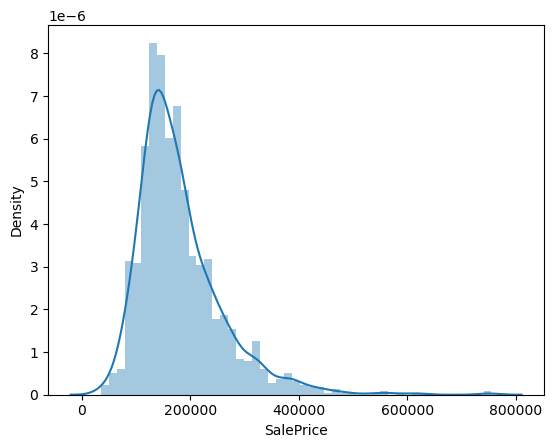


--------------------------------------
Columna: OverallQual
--------------------------------------
Media:  6.0993150684931505
Maximo:  10.0
Minimo:  1.0
Desviacion Standar: 1.3829965467415923
Rango peak to peak: 9.0
Valores Nulos:  0



C:\Users\XPRS\AppData\Local\Temp\ipykernel_16308\3392892565.py:18: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataSet[col])


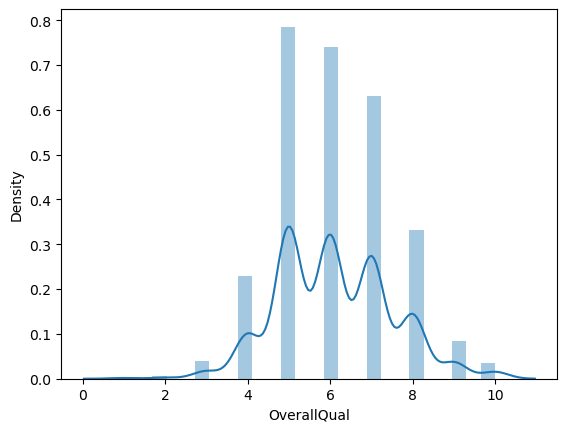


--------------------------------------
Columna: 1stFlrSF
--------------------------------------
Media:  1162.626712328767
Maximo:  4692.0
Minimo:  334.0
Desviacion Standar: 386.5877380410738
Rango peak to peak: 4358.0
Valores Nulos:  0



C:\Users\XPRS\AppData\Local\Temp\ipykernel_16308\3392892565.py:18: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataSet[col])


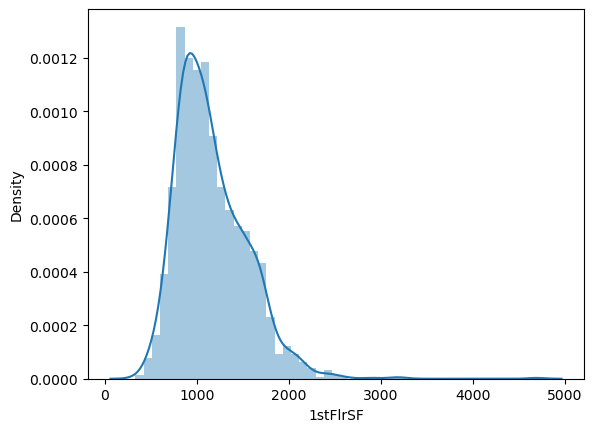

C:\Users\XPRS\AppData\Local\Temp\ipykernel_16308\3392892565.py:18: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataSet[col])



--------------------------------------
Columna: TotRmsAbvGrd
--------------------------------------
Media:  6.517808219178082
Maximo:  14.0
Minimo:  2.0
Desviacion Standar: 1.625393290584064
Rango peak to peak: 12.0
Valores Nulos:  0



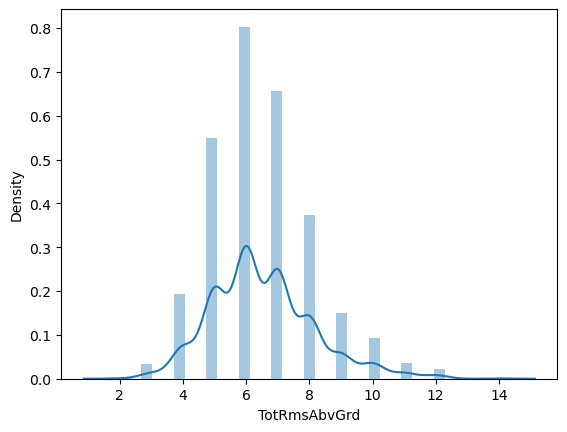


--------------------------------------
Columna: YearBuilt
--------------------------------------
Media:  1971.267808219178
Maximo:  2010.0
Minimo:  1872.0
Desviacion Standar: 30.202904042525265
Rango peak to peak: 138.0
Valores Nulos:  0



C:\Users\XPRS\AppData\Local\Temp\ipykernel_16308\3392892565.py:18: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataSet[col])


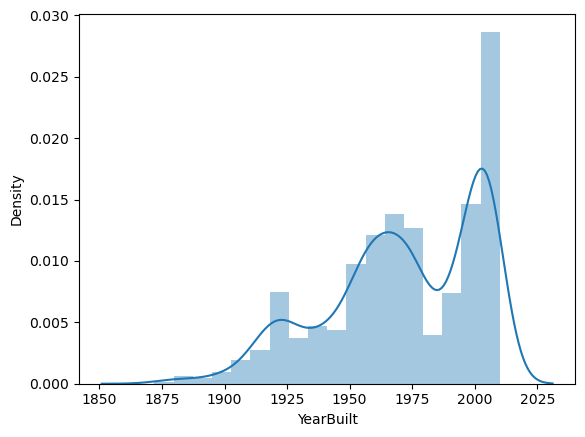


--------------------------------------
Columna: LotFrontage
--------------------------------------
Media:  70.04995836802665
Maximo:  313.0
Minimo:  21.0
Desviacion Standar: 24.284751774483183
Rango peak to peak: nan
Valores Nulos:  259



C:\Users\XPRS\AppData\Local\Temp\ipykernel_16308\3392892565.py:18: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataSet[col])


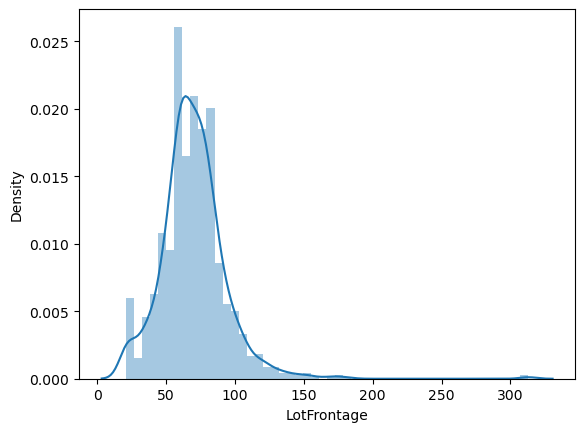

In [41]:
#ANALISIS EXPLORATORIO DE LOS DATOS 

for col in dataSet.columns:
    dtExploratorios = dataSet[col].describe()
    print("--------------------------------------")
    print(f"Columna: {col}")
    print("--------------------------------------")
    #print(dtExploratorios)
    print("Media: ",dtExploratorios["mean"])
    print("Maximo: ",dtExploratorios["max"])
    print("Minimo: ",dtExploratorios["min"])
    print("Desviacion Standar:",dtExploratorios["std"])
    print("Rango peak to peak:",np.ptp(dataSet[col]))
    print("Valores Nulos: ", dataSet[col].isnull().sum())
    print()
    
    
    sns.distplot(dataSet[col])
    plt.show()
    
    print()